In [1]:
library(ggplot2); library(scales); library(grid); library(RColorBrewer)

In [2]:
# edit this with dplyr

bachelor <- read.csv('data/bachelor_contestants.csv')
bachelorette <- read.csv('data/bachelorette_contestants.csv')
bachelor <- subset(bachelor, select = -index) # delete the index column
bachelorette <- subset(bachelorette, select = -index) # delete the index column

bachelor$show <- 'bachelor'
bachelorette$show <- 'bachelorette'

### Mean Age of Contestants on the Bachelorette

In [3]:
mean(bachelorette$age)

[1] 29.05058

### Mean Age of Contestants on the Bachelorette

In [4]:
mean(bachelor$age, na.rm = TRUE)

[1] 26.4511

In [5]:
# bind frames together
all <- rbind(bachelor, bachelorette)

### Plot Theming

Below is a custom theme template that I will use across all plots to make them a bit more aesthetically pleasing. This is a simple function that should be fairly straight forward to edit. This version came from [here](http://minimaxir.com/2015/02/ggplot-tutorial/). Notice in the following plots how I simply call this function to add the theme to the plot. 

In [44]:
fte_theme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9)
    color.background = palette[2]
    color.grid.major = palette[3]
    color.axis.text = palette[6]
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a light gray color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="none") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

### Histograms of Contesetant Ages

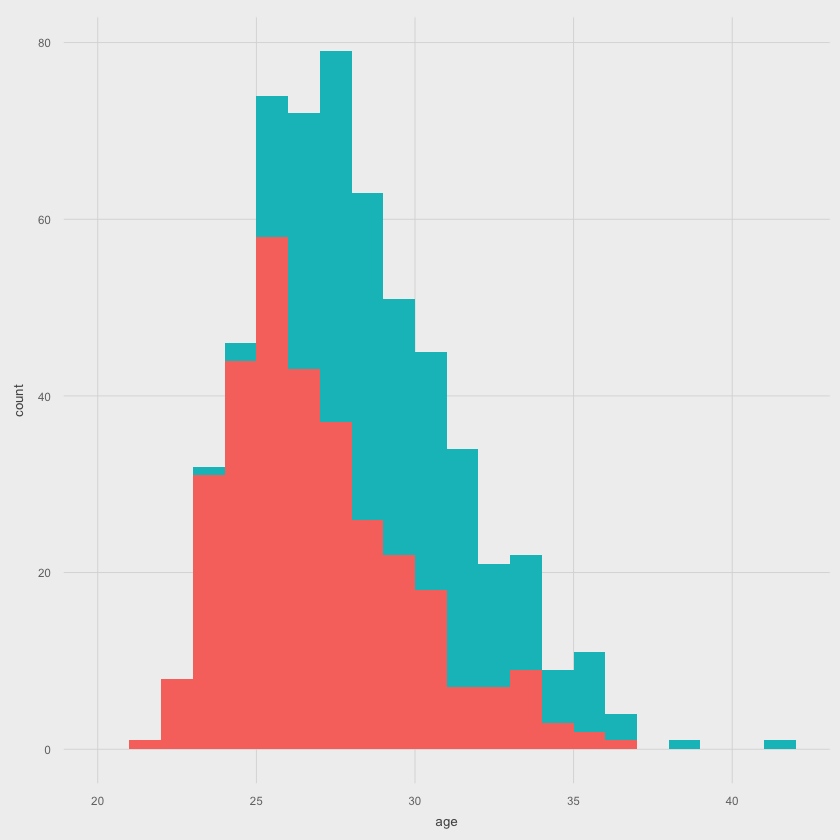

In [7]:
# plot histogram of ages

ggplot(all, aes(age))+geom_histogram(binwidth = 1, aes(fill = factor(show))) + fte_theme()

### Mean Age by Season by Show

In [6]:
library(plyr)

# find the mean age per season per show
bachelor_mean<-ddply(na.omit(bachelor), .(season), summarize, mean=mean(age))
bachelorette_mean<-ddply(na.omit(bachelorette), .(season), summarize, mean=mean(age))

In [7]:
# create a show feature
bachelorette_mean$show<-'bachelorette'
bachelor_mean$show<-'bachelor'

# bind frames together
all_mean<-rbind(bachelorette_mean,bachelor_mean)

In [8]:
ggplot(all_mean,aes(x = season, y = mean)) + geom_line(aes(colour = factor(show))) + fte_theme()

ERROR: Error in eval(expr, envir, enclos): could not find function "fte_theme"


### Plot Age of Winners per Season


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



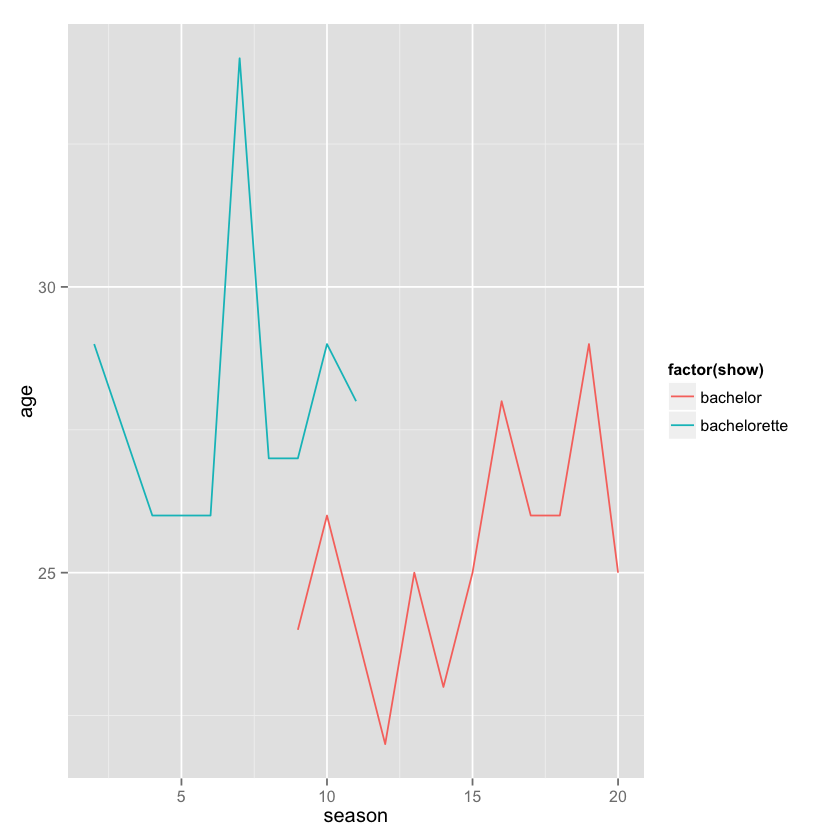

In [9]:
library(dplyr)

all %>% 
  filter(elimination == 'Winner') %>%
  ggplot(aes(x = season, y = age, colour = factor(show))) + geom_line()


### Difference between Age of Winner and the Mean Age per Season

In order to do this, I need to create two new frames. The first must have the mean age per season per show of the contestants and the second must contain only the rows of the winners. Then I must merge these two frames on season and show.

In [10]:
library(dplyr)

mean_all <-
na.omit(all) %>% 
  group_by(season, show) %>%
  summarise(mean=mean(age), sd=sd(age))

winners <-
all %>%
  filter(elimination == 'Winner')
  

In [11]:
total <- merge(winners,mean_all, by = c('season','show'))

In [12]:
# age difference of winner from the mean age that season

total %>%
  mutate(diff = age - mean) %>%
  ggplot(aes(x = season, y = diff, colour = factor(show))) + geom_line() + 
  scale_colour_manual(values = c("#b21c0e", "navy")) + fte_theme()

ERROR: Error in eval(expr, envir, enclos): could not find function "fte_theme"


In [13]:
names(total)

[1] "season"            "show"              "age"              
 [4] "elimination"       "first_name"        "hometown"         
 [7] "name"              "name_abbreviation" "occupation"       
[10] "mean"              "sd"

In [14]:
# age difference of winner from the mean age that season

total %>%
  mutate(diff = age - mean) %>%
  ggplot(aes(x = season, fill  = factor(show)))  + geom_line(aes(y = age, colour = 'blue')) + 
  geom_line(aes(y = mean, colour = 'red')) +
  scale_colour_manual(values = c("#b21c0e", "navy")) + fte_theme()

ERROR: Error in eval(expr, envir, enclos): could not find function "fte_theme"


In [20]:
na.omit(all) %>%
  group_by(show,elimination) %>%
  summarise(mean=mean(age))
  

,show,elimination,mean
1,bachelor,1,26.85586
2,bachelor,2,27.02632
3,bachelor,3,26.54286
4,bachelor,4,26.05714
5,bachelor,5,25.52174
6,bachelor,6,25.5
7,bachelor,7,26.22222
8,bachelor,8,26.5
9,bachelor,9,27.16667
10,bachelor,Runner-up,26.125


In [26]:
bachelorette[bachelorette$elimination=="",]

,age,elimination,first_name,hometown,name,name_abbreviation,occupation,season,show
232,27,,Chase,"Castle Rock, Colorado",Chase McNary,Chase M.,Medical Sales Rep,12,bachelorette
233,27,,Jordan,"Chico, California",Jordan Rodgers,Jordan R.,Former Pro Quarterback,12,bachelorette
234,31,,Luke,"Burnet, Texas",Luke Pell,Luke P.,War Veteran,12,bachelorette
235,27,,Robby,"St. Augustine, Florida",Robby Hayes,Robby H.,Former Competitive Swimmer,12,bachelorette


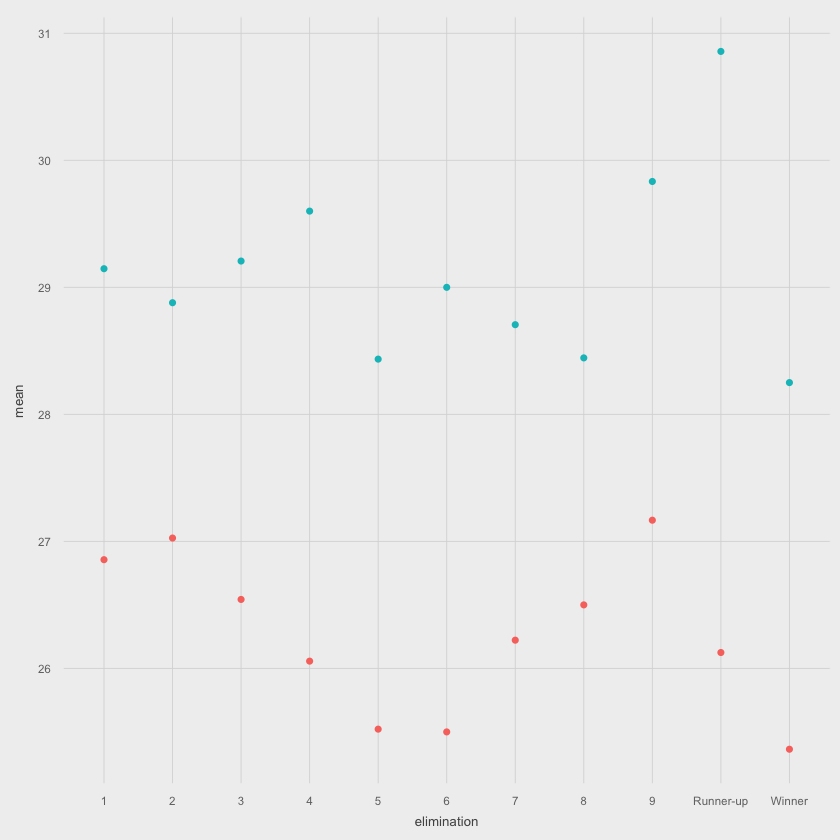

In [48]:
all %>% 
  filter(complete.cases(.)) %>%
  mutate(elimination=replace(elimination, elimination=="Runner Up", "Runner-up")) %>%
  group_by(show,elimination) %>%
  summarise(mean=mean(age)) %>%
  filter(elimination != "") %>%
  ggplot(aes(x = elimination, y = mean, colour  = factor(show)))  + geom_point() + fte_theme()

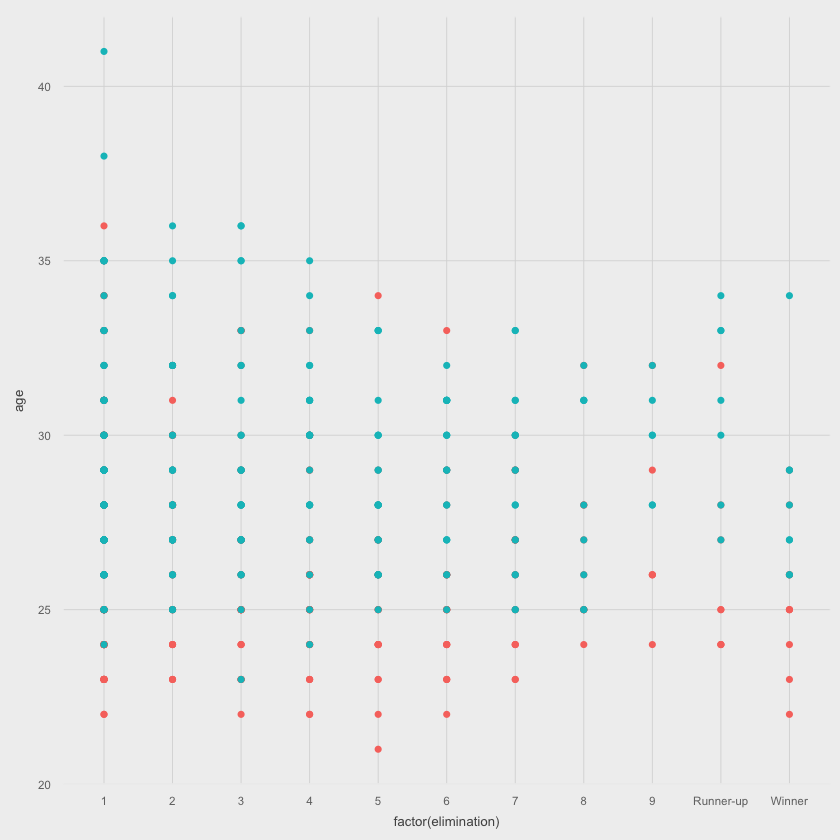

In [49]:
all %>% 
  filter(complete.cases(.)) %>%
  mutate(elimination=replace(elimination, elimination=="Runner Up", "Runner-up")) %>%
  filter(elimination != "") %>%
  ggplot(aes(x = factor(elimination), y = age, colour  = factor(show)))  + geom_point() + fte_theme()